In [1]:
from fastai.vision.all import *
from fastai.metrics import *
from matplotlib import pyplot as plt

In [2]:
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
conda install -c conda-forge ipywidgets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\epi\anaconda3

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ruamel.yaml-0.17.21        |   py39hb82d6ee_1         169 KB  conda-forge
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None
  ruamel.yaml        conda-forge/win-64::ruamel.yaml-0.17.21-py39hb82d6ee_1 None
  ruamel.yaml.clib   pkgs/main/win-64::ruamel.yaml.clib-0.2.6-py39h2bbff1b_1 



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import torch
import torchvision

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
torch.cuda.empty_cache()

In [8]:
#set path to root directory
path = Path('C:\\Users\\epi\\Desktop\\Fastai\\m_classification')

In [9]:
path.ls()

(#12) [Path('C:/Users/epi/Desktop/Fastai/m_classification/.ipynb_checkpoints'),Path('C:/Users/epi/Desktop/Fastai/m_classification/k_M_jacket'),Path('C:/Users/epi/Desktop/Fastai/m_classification/k_M_jeans'),Path('C:/Users/epi/Desktop/Fastai/m_classification/K_M_pants'),Path('C:/Users/epi/Desktop/Fastai/m_classification/k_M_shorts'),Path('C:/Users/epi/Desktop/Fastai/m_classification/k_M_t-shirt'),Path('C:/Users/epi/Desktop/Fastai/m_classification/M_belt'),Path('C:/Users/epi/Desktop/Fastai/m_classification/M_jackets'),Path('C:/Users/epi/Desktop/Fastai/m_classification/M_jeans'),Path('C:/Users/epi/Desktop/Fastai/m_classification/M_pants')...]

In [10]:
class_names = []
for folder_name in os.listdir(path):
    class_names.append(folder_name)

In [11]:
class_names

['.ipynb_checkpoints',
 'k_M_jacket',
 'k_M_jeans',
 'K_M_pants',
 'k_M_shorts',
 'k_M_t-shirt',
 'M_belt',
 'M_jackets',
 'M_jeans',
 'M_pants',
 'M_shorts',
 'M_t-shirt']

In [12]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{path}/{class_name}')
    for image_name in image_names:
        image_path = f'{path}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [13]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [14]:
df.head()

,name,label
0,C:\Users\epi\Desktop\Fastai\m_classification/k_M_jacket/001_632213b5.jpg,1
1,C:\Users\epi\Desktop\Fastai\m_classification/k_M_jacket/002_3ff9e6de.jpg,1
2,C:\Users\epi\Desktop\Fastai\m_classification/k_M_jacket/003_144c26da.jpg,1
3,C:\Users\epi\Desktop\Fastai\m_classification/k_M_jacket/004_ec9bb700.jpg,1
4,C:\Users\epi\Desktop\Fastai\m_classification/k_M_jacket/005_e1b38275.jpg,1


In [15]:
df.tail()

,name,label
5230,C:\Users\epi\Desktop\Fastai\m_classification/M_t-shirt/496_1fe249a1.jpg,11
5231,C:\Users\epi\Desktop\Fastai\m_classification/M_t-shirt/497_29214a73.jpg,11
5232,C:\Users\epi\Desktop\Fastai\m_classification/M_t-shirt/498_01db8e21.jpg,11
5233,C:\Users\epi\Desktop\Fastai\m_classification/M_t-shirt/499_32fc4866.jpg,11
5234,C:\Users\epi\Desktop\Fastai\m_classification/M_t-shirt/500_340b6db7.jpg,11


In [16]:
#convert into csv file
df.to_csv(
    path_or_buf=f'{path}/labels.csv',
    index=False
)

In [17]:
dls =ImageDataLoaders.from_folder(
    bs=8,  path=path,
    item_tfms=Resize(224),
#   size=224,
    num_workers=0,  
    valid_pct=0.2, seed=42)

In [18]:
dls.vocab

['K_M_pants', 'M_belt', 'M_jackets', 'M_jeans', 'M_pants', 'M_shorts', 'M_t-shirt', 'k_M_jacket', 'k_M_jeans', 'k_M_shorts', 'k_M_t-shirt']

In [19]:
print(dls.vocab, dls.c)

['K_M_pants', 'M_belt', 'M_jackets', 'M_jeans', 'M_pants', 'M_shorts', 'M_t-shirt', 'k_M_jacket', 'k_M_jeans', 'k_M_shorts', 'k_M_t-shirt'] 11


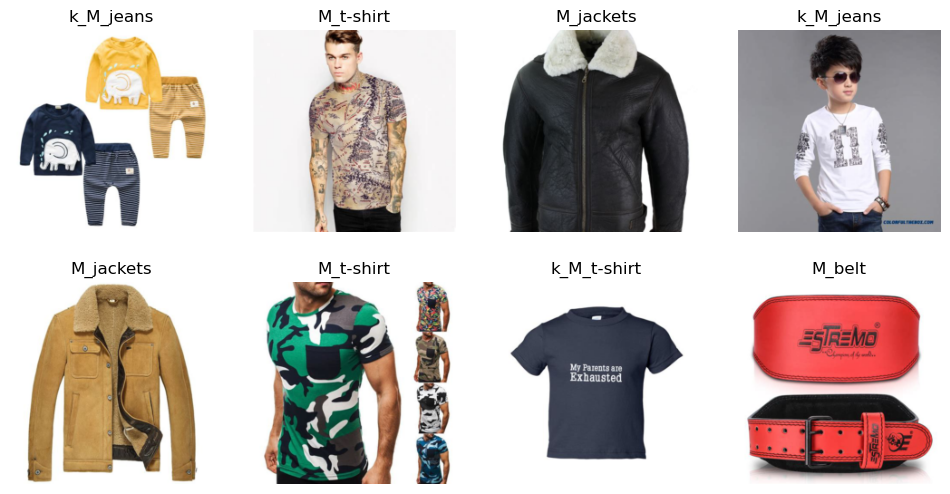

In [20]:
dls.show_batch()

In [21]:
print(len(dls.train_ds), len(dls.valid_ds))

4188 1047


In [22]:
learn = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [23]:
learn.fine_tune(
    epochs=5
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.625093,1.433549,0.581662,0.418338,59:16


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.278052,1.126356,0.639924,0.360076,1:13:01
1,1.277878,1.034642,0.661891,0.338109,1:10:03
2,0.932192,0.878940,0.686724,0.313276,1:10:10
3,0.684705,0.788432,0.692455,0.307545,1:10:32
4,0.470714,0.815450,0.700096,0.299904,1:11:20


In [24]:
learn.save('m_classification')

Path('C:/Users/epi/Desktop/Fastai/m_classification/models/m_classification.pth')

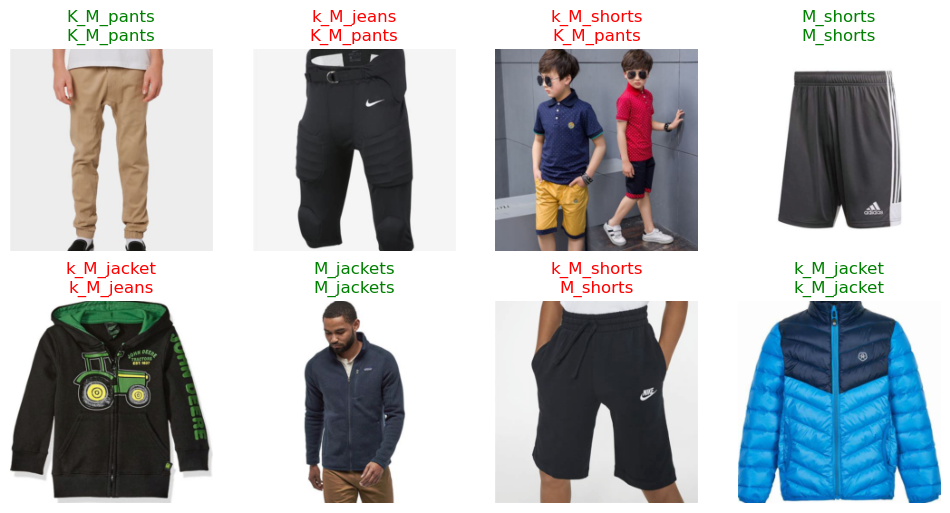

In [25]:
learn.show_results()

In [26]:
learn.export('m_classification.pkl')

In [27]:
new_learn = load_learner(f'{path}/m_classification.pkl')

In [29]:
new_learn.predict(
    item= 'C:\\Users\\epi\\Desktop\\Fastai\\m_classification\\M_pants\\011_76c5c6cc.jpg'
)

('M_pants',
 TensorBase(4),
 TensorBase([2.4200e-06, 2.6501e-07, 3.2743e-06, 3.8012e-04, 9.9952e-01,
             9.4779e-05, 8.8505e-07, 1.0037e-07, 1.4361e-06, 1.4183e-08,
             1.4517e-06]))